In [3]:
import pandas as pd
pd.set_option('display.max_rows', 500)
import numpy as np

In [4]:
df = pd.read_csv(r'C:\Users\yokeshkumar\Downloads\Logistic cost prediction project\data\LogisticCostData-26122022False.csv')

In [5]:
df_dist = pd.read_csv(r'C:\Users\yokeshkumar\Downloads\Logistic cost prediction project\data\distance_df.csv')

# Data Profiling


In [6]:
df.shape

(9226, 21)

In [7]:
df.columns

Index(['ID', 'Status', 'Sale Order Date', 'Expected Logistic Cost',
       'Difference', 'error', 'V Saleorder → CategoryName',
       'V Saleorder → TotalListingQuantity', 'V Saleorder → TotalQuantity',
       'V Saleorder → PickedQuantity', 'V Saleorder → LogisticCost',
       'V Saleorder → TruckPlacedBySeller', 'V Saleorder → SellerPickupCity',
       'V Saleorder → SellerPickupState', 'V Saleorder → SellerPickupZone',
       'V Saleorder → RecyclerShippingCity',
       'V Saleorder → RecyclerShippingState',
       'V Saleorder → RecyclerShippingZone', 'Question 1275 → PickZipcode',
       'Question 1275 → DropZip', 'Vehicle → Capacity'],
      dtype='object')

In [8]:
df.head()

,ID,Status,Sale Order Date,Expected Logistic Cost,Difference,error,V Saleorder → CategoryName,V Saleorder → TotalListingQuantity,V Saleorder → TotalQuantity,V Saleorder → PickedQuantity,...,V Saleorder → TruckPlacedBySeller,V Saleorder → SellerPickupCity,V Saleorder → SellerPickupState,V Saleorder → SellerPickupZone,V Saleorder → RecyclerShippingCity,V Saleorder → RecyclerShippingState,V Saleorder → RecyclerShippingZone,Question 1275 → PickZipcode,Question 1275 → DropZip,Vehicle → Capacity
0,SO12222411,DISPATCHED,2022-12-24T08:26:32,94782.30,-24782.30,-35.403286,PET,18000,18000,17260,...,1,Bangalore,Karnataka,Southern Zone,Bhilwara,Rajasthan,Northern Zone,560083.0,311001.0,20
1,SO12222410,DISPATCHED,2022-12-24T07:30:00,94782.30,-24782.30,-35.403286,PET,18000,18000,17060,...,1,Bengaluru,Karnataka,Southern Zone,Bhilwara,Rajasthan,Northern Zone,560068.0,311001.0,20
2,SO1222244,RECEIVED_BY_RECYCLER,2022-12-24T05:53:06,17659.34,-3379.34,-23.664846,PET,10000,10000,9520,...,1,Palghar,Maharashtra,Western Zone,Surat,Gujarat,Western Zone,401208.0,394125.0,15
3,SO12222375,TRUCK_ASSIGNED,2022-12-23T17:51:18,85282.58,4717.42,5.241578,PET,15000,15000,0,...,1,Eluru,Andhra Pradesh,Southern Zone,Kanpur,Uttar Pradesh,Central Zone,534002.0,209304.0,15
4,SO12222355,DISPATCHED,2022-12-23T12:31:11,117517.23,-11862.23,-11.227325,PET,18000,18000,24860,...,1,Chennai,Tamil Nadu,Southern Zone,Bhilwara,Rajasthan,Northern Zone,600075.0,311024.0,20


In [9]:
df = df[df['Status'] !='CANCELLED']
df = df[df['Status'] !='PLACED']
df = df[df['Status'] !='APPROVED']
df = df[df['V Saleorder → CategoryName'] != 'Mild Steel Scrap']


In [10]:
df = df.dropna()

In [11]:
df.head()

,ID,Status,Sale Order Date,Expected Logistic Cost,Difference,error,V Saleorder → CategoryName,V Saleorder → TotalListingQuantity,V Saleorder → TotalQuantity,V Saleorder → PickedQuantity,...,V Saleorder → TruckPlacedBySeller,V Saleorder → SellerPickupCity,V Saleorder → SellerPickupState,V Saleorder → SellerPickupZone,V Saleorder → RecyclerShippingCity,V Saleorder → RecyclerShippingState,V Saleorder → RecyclerShippingZone,Question 1275 → PickZipcode,Question 1275 → DropZip,Vehicle → Capacity
0,SO12222411,DISPATCHED,2022-12-24T08:26:32,94782.30,-24782.30,-35.403286,PET,18000,18000,17260,...,1,Bangalore,Karnataka,Southern Zone,Bhilwara,Rajasthan,Northern Zone,560083.0,311001.0,20
1,SO12222410,DISPATCHED,2022-12-24T07:30:00,94782.30,-24782.30,-35.403286,PET,18000,18000,17060,...,1,Bengaluru,Karnataka,Southern Zone,Bhilwara,Rajasthan,Northern Zone,560068.0,311001.0,20
2,SO1222244,RECEIVED_BY_RECYCLER,2022-12-24T05:53:06,17659.34,-3379.34,-23.664846,PET,10000,10000,9520,...,1,Palghar,Maharashtra,Western Zone,Surat,Gujarat,Western Zone,401208.0,394125.0,15
3,SO12222375,TRUCK_ASSIGNED,2022-12-23T17:51:18,85282.58,4717.42,5.241578,PET,15000,15000,0,...,1,Eluru,Andhra Pradesh,Southern Zone,Kanpur,Uttar Pradesh,Central Zone,534002.0,209304.0,15
4,SO12222355,DISPATCHED,2022-12-23T12:31:11,117517.23,-11862.23,-11.227325,PET,18000,18000,24860,...,1,Chennai,Tamil Nadu,Southern Zone,Bhilwara,Rajasthan,Northern Zone,600075.0,311024.0,20


In [12]:
df.shape

(6345, 21)

In [13]:
#dropping unwanted columns
df = df.drop(['ID','Status','Sale Order Date','Expected Logistic Cost','Difference','error','Vehicle → Capacity','V Saleorder → TotalListingQuantity',
             'V Saleorder → TotalQuantity','V Saleorder → TruckPlacedBySeller','V Saleorder → RecyclerShippingZone','V Saleorder → SellerPickupZone'],axis = 1)

In [14]:
df.columns

Index(['V Saleorder → CategoryName', 'V Saleorder → PickedQuantity',
       'V Saleorder → LogisticCost', 'V Saleorder → SellerPickupCity',
       'V Saleorder → SellerPickupState', 'V Saleorder → RecyclerShippingCity',
       'V Saleorder → RecyclerShippingState', 'Question 1275 → PickZipcode',
       'Question 1275 → DropZip'],
      dtype='object')

In [15]:
#Renaming Columns

df.rename(columns = {'V Saleorder → CategoryName':'CategoryName','V Saleorder → PickedQuantity':'PickedQuantity',
                    'V Saleorder → LogisticCost':'LogisticCost','V Saleorder → TruckPlacedBySeller':'TruckPlacedBySeller',
                    'V Saleorder → SellerPickupCity':'SellerPickupCity','V Saleorder → SellerPickupState':'SellerPickupState',
                    'V Saleorder → RecyclerShippingCity':'RecyclerShippingCity',
                    'V Saleorder → RecyclerShippingState':'RecyclerShippingState',
                    'Question 1275 → PickZipcode':'PickZipcode','Question 1275 → DropZip':'DropZip'}, inplace = True)                            

In [16]:
df_dist.head()

,route,distance
0,110041-173205,288.6894
1,110041-303108,161.4135
2,208015-303108,562.6703
3,560068-311001,1666.1665
4,570015-641113,203.2509


In [17]:
# converting zipcodes from float to int
#df['PickZipcode'] = df['PickZipcode'].fillna(0)
df['PickZipcode'] = df['PickZipcode'].astype(int)
#df['DropZip'] = df['DropZip'].fillna(0)
df['DropZip'] = df['DropZip'].astype(int)

In [18]:
df['route'] = df['PickZipcode'].astype(str) + '-' + df['DropZip'].astype(str)

In [19]:
df_1 = pd.merge(df,df_dist, on='route', how='left')

In [20]:
df_1.head()

,CategoryName,PickedQuantity,LogisticCost,SellerPickupCity,SellerPickupState,RecyclerShippingCity,RecyclerShippingState,PickZipcode,DropZip,route,distance
0,PET,17260,70000.0,Bangalore,Karnataka,Bhilwara,Rajasthan,560083,311001,560083-311001,1660.3600
1,PET,17060,70000.0,Bengaluru,Karnataka,Bhilwara,Rajasthan,560068,311001,560068-311001,1666.1665
2,PET,9520,14280.0,Palghar,Maharashtra,Surat,Gujarat,401208,394125,401208-394125,270.0400
3,PET,0,90000.0,Eluru,Andhra Pradesh,Kanpur,Uttar Pradesh,534002,209304,534002-209304,1451.2500
4,PET,24860,105655.0,Chennai,Tamil Nadu,Bhilwara,Rajasthan,600075,311024,600075-311024,2027.2300


# Data Cleaning

In [21]:
df_1.isnull().sum()

CategoryName             0
PickedQuantity           0
LogisticCost             0
SellerPickupCity         0
SellerPickupState        0
RecyclerShippingCity     0
RecyclerShippingState    0
PickZipcode              0
DropZip                  0
route                    0
distance                 0
dtype: int64

In [22]:
df_1.head(5)

,CategoryName,PickedQuantity,LogisticCost,SellerPickupCity,SellerPickupState,RecyclerShippingCity,RecyclerShippingState,PickZipcode,DropZip,route,distance
0,PET,17260,70000.0,Bangalore,Karnataka,Bhilwara,Rajasthan,560083,311001,560083-311001,1660.3600
1,PET,17060,70000.0,Bengaluru,Karnataka,Bhilwara,Rajasthan,560068,311001,560068-311001,1666.1665
2,PET,9520,14280.0,Palghar,Maharashtra,Surat,Gujarat,401208,394125,401208-394125,270.0400
3,PET,0,90000.0,Eluru,Andhra Pradesh,Kanpur,Uttar Pradesh,534002,209304,534002-209304,1451.2500
4,PET,24860,105655.0,Chennai,Tamil Nadu,Bhilwara,Rajasthan,600075,311024,600075-311024,2027.2300


In [23]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6345 entries, 0 to 6344
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CategoryName           6345 non-null   object 
 1   PickedQuantity         6345 non-null   int64  
 2   LogisticCost           6345 non-null   float64
 3   SellerPickupCity       6345 non-null   object 
 4   SellerPickupState      6345 non-null   object 
 5   RecyclerShippingCity   6345 non-null   object 
 6   RecyclerShippingState  6345 non-null   object 
 7   PickZipcode            6345 non-null   int32  
 8   DropZip                6345 non-null   int32  
 9   route                  6345 non-null   object 
 10  distance               6345 non-null   float64
dtypes: float64(2), int32(2), int64(1), object(6)
memory usage: 545.3+ KB


In [24]:
df_1.describe()

,PickedQuantity,LogisticCost,PickZipcode,DropZip,distance
count,6345.000000,6345.000000,6345.000000,6345.000000,6345.000000
mean,13841.261939,39716.479669,462413.803467,366009.005359,816.020999
std,4941.307778,30620.887681,186111.419091,151868.793338,609.873652
min,0.000000,1.000000,110018.000000,121004.000000,0.000000
25%,10010.000000,11635.000000,400070.000000,244923.000000,277.487800
50%,14240.000000,34000.000000,501301.000000,332404.000000,750.714900
75%,16520.000000,62000.000000,560068.000000,462046.000000,1342.349100
max,130000.000000,170000.000000,854326.000000,815301.000000,2481.477800


In [25]:
df_1.isnull().sum()

CategoryName             0
PickedQuantity           0
LogisticCost             0
SellerPickupCity         0
SellerPickupState        0
RecyclerShippingCity     0
RecyclerShippingState    0
PickZipcode              0
DropZip                  0
route                    0
distance                 0
dtype: int64

# Exploratory Data Analysis - part 1

In [26]:
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [27]:
#Numerical Features
num_fea = df_1[['LogisticCost','PickedQuantity','distance']]

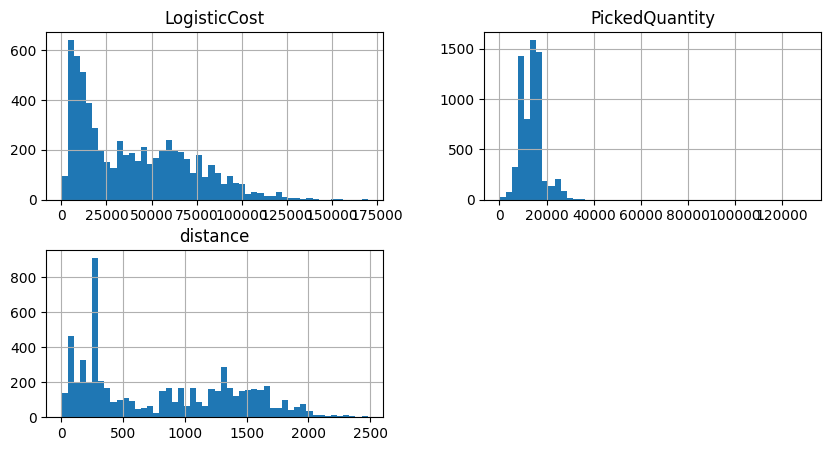

In [28]:
num_fea.hist(bins=50, figsize=(10,5));

In [29]:
df_1 = df_1[df_1['LogisticCost'] != 0]
df_1 = df_1[df_1['distance'] != 0]
df_1 = df_1[df_1['PickedQuantity'] != 0]

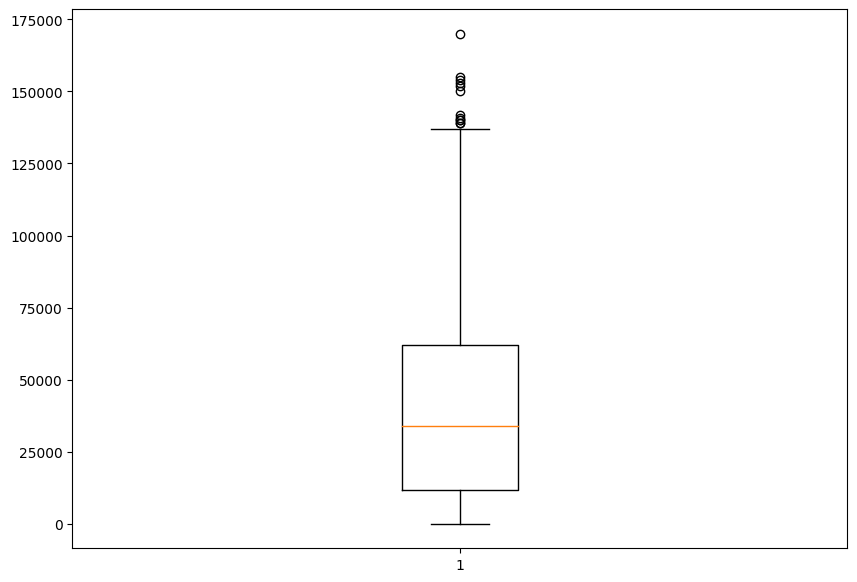

In [30]:
#Checking Outliers in LogisticCost
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(df_1['LogisticCost'])
 
# show plot
plt.show()

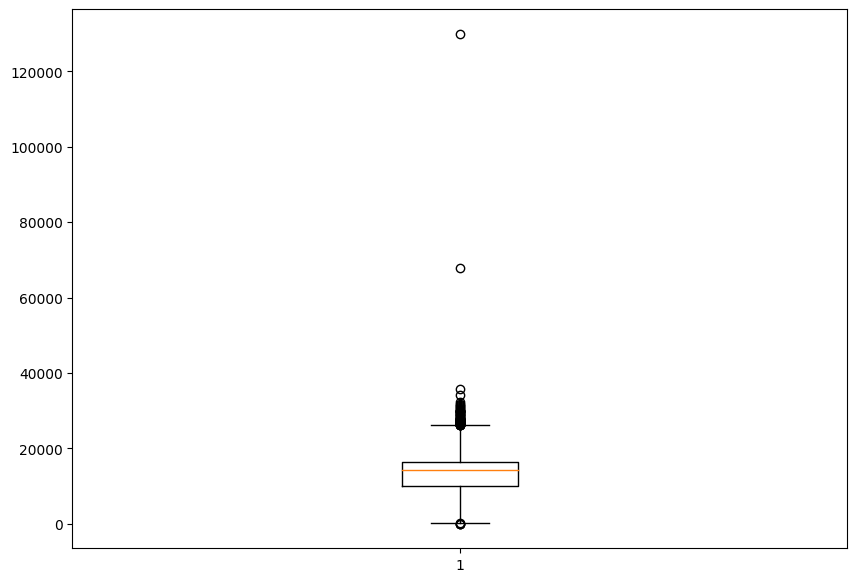

In [31]:
#Checking Outliers in PickedQuantity
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(df_1['PickedQuantity'])
 
# show plot
plt.show()

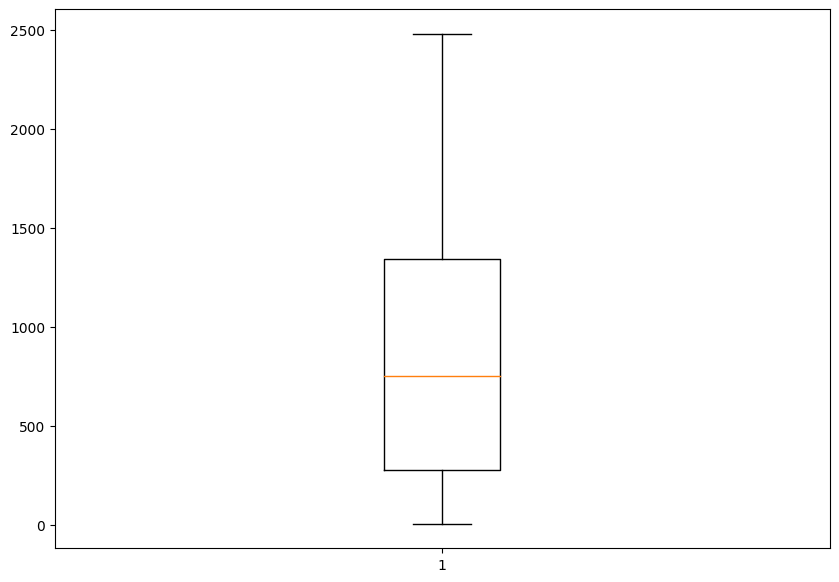

In [32]:
#Checking Outliers in PickedQuantity
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(df_1['distance'])
 
# show plot
plt.show()

In [33]:
#Removing outliers
df_1 = df_1[df_1['PickedQuantity'] < 26000]
df_1 = df_1[df_1['PickedQuantity'] < 110000]

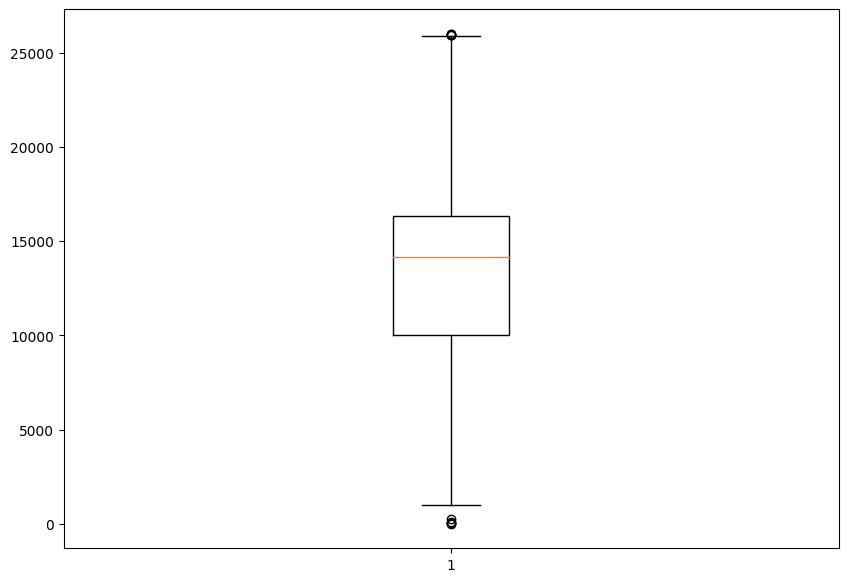

In [34]:
#Checking Outliers in PickedQuantity
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(df_1['PickedQuantity'])
 
# show plot
plt.show()

In [35]:
#Categorical features
cat_fea = [feature for feature in df_1.columns if df_1[feature].dtypes=='O']

In [36]:
cat_fea

['CategoryName',
 'SellerPickupCity',
 'SellerPickupState',
 'RecyclerShippingCity',
 'RecyclerShippingState',
 'route']

In [37]:
for feature in cat_fea:
    print('The feature is {} and number of categories are {}'.format(feature,len(df_1[feature].unique())))

The feature is CategoryName and number of categories are 9
The feature is SellerPickupCity and number of categories are 245
The feature is SellerPickupState and number of categories are 25
The feature is RecyclerShippingCity and number of categories are 93
The feature is RecyclerShippingState and number of categories are 18
The feature is route and number of categories are 1542


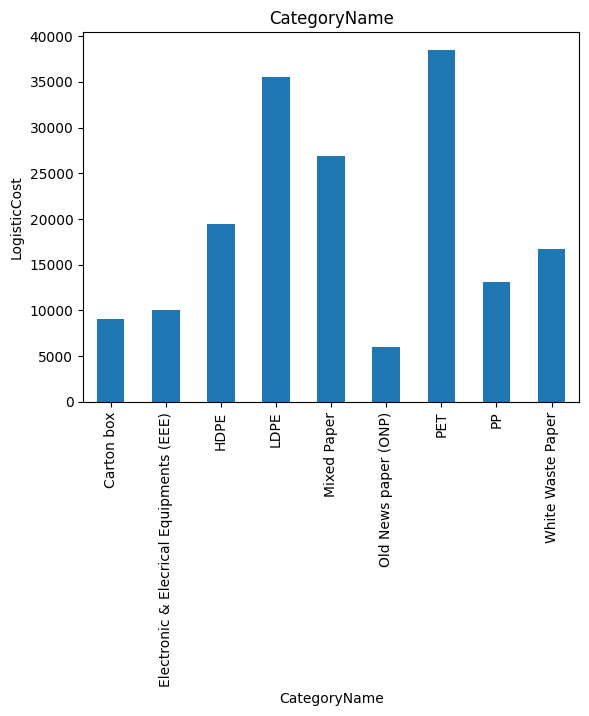

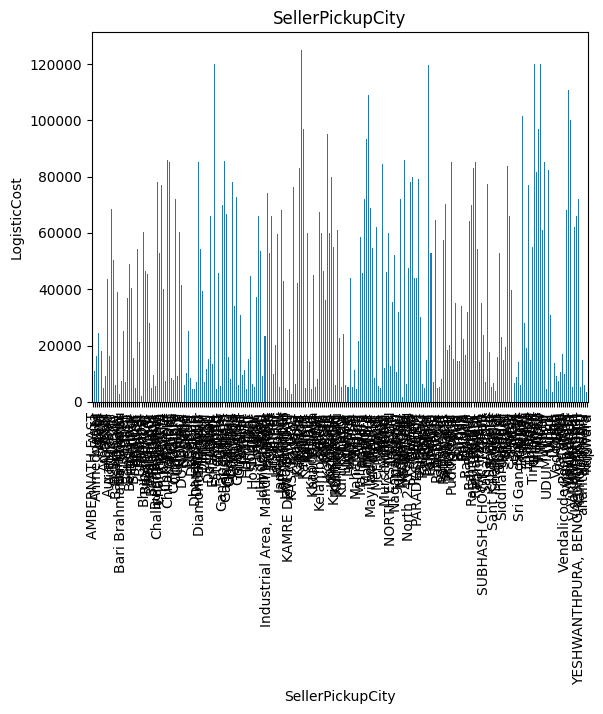

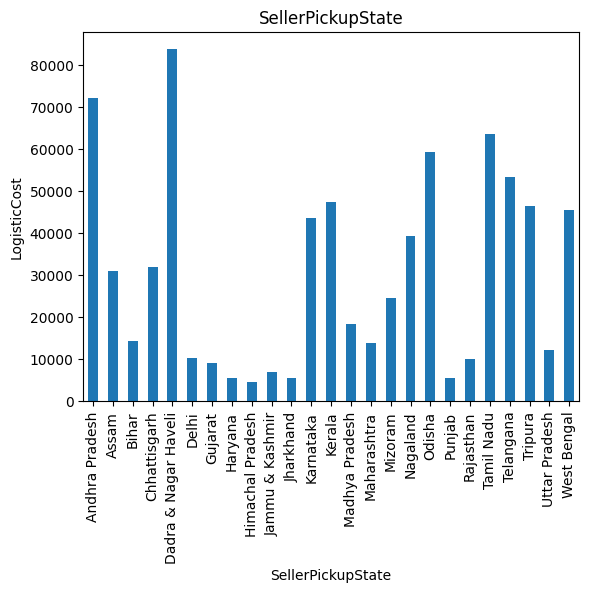

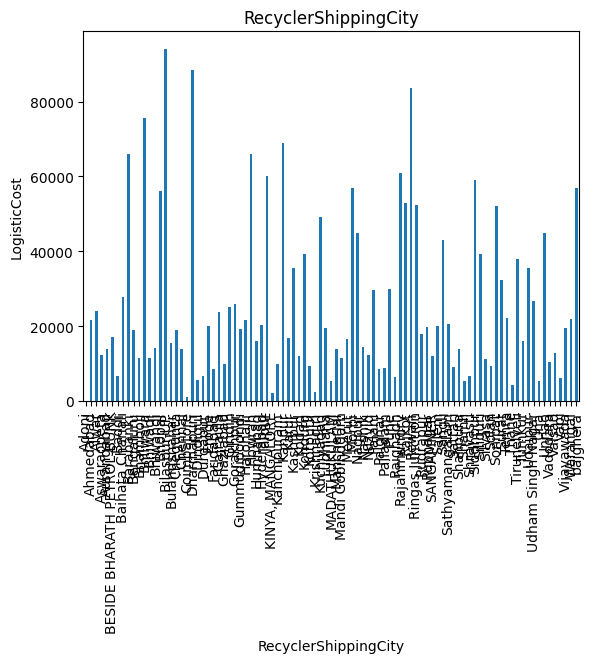

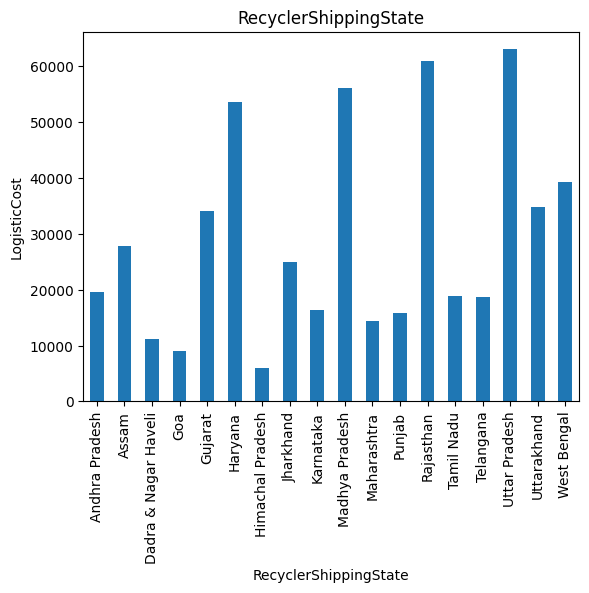

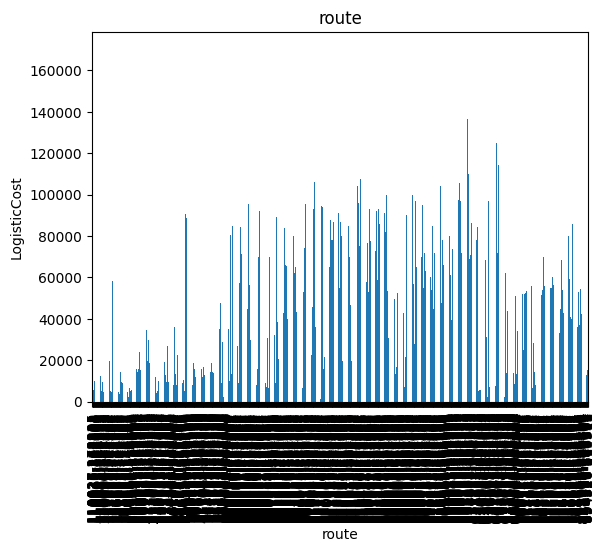

In [38]:
##Relationship between categorical variable and dependent feature - Logistic price
for feature in cat_fea:
    data=df_1.copy()
    data.groupby(feature)['LogisticCost'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('LogisticCost')
    plt.title(feature)
    plt.show()

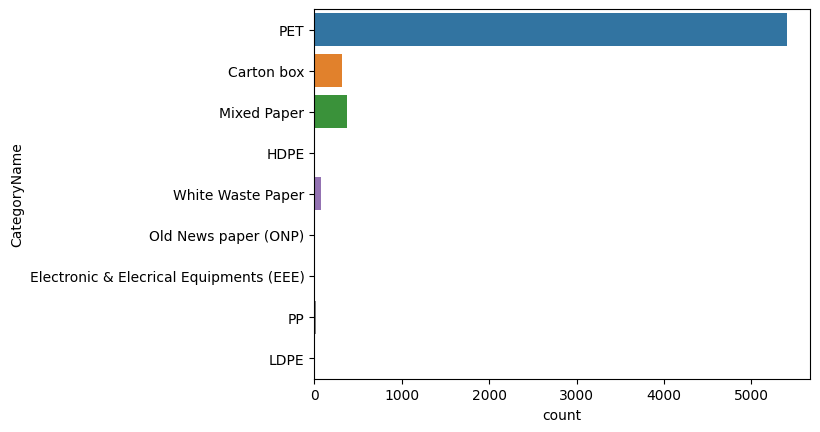

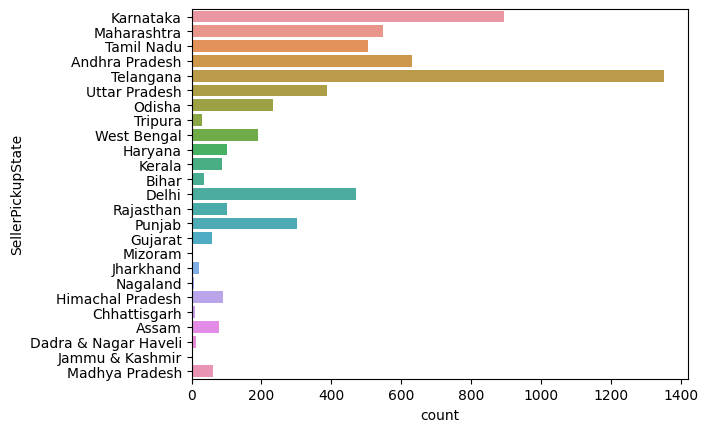

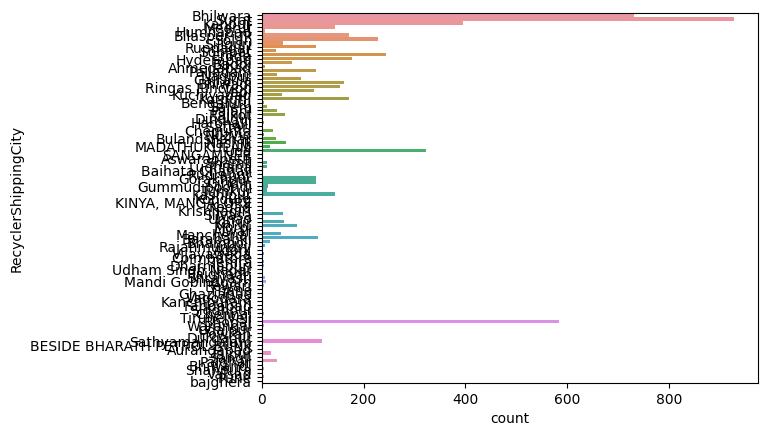

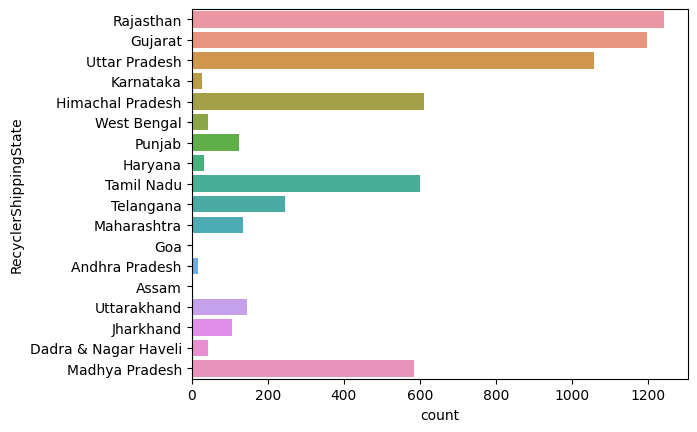

In [39]:
for col in df_1.select_dtypes(include='object'):
    if df_1[col].nunique() <= 100:
        sns.countplot(y=col, data=df_1)
        plt.show()

In [40]:
#Handling Categorical Variables 
#Frequency or Count based encoding
for feature in cat_fea:
    labels_ordered=df_1.groupby([feature])['LogisticCost'].median().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    df_1[feature]=df_1[feature].map(labels_ordered)

In [41]:
df_1.head(100)

,CategoryName,PickedQuantity,LogisticCost,SellerPickupCity,SellerPickupState,RecyclerShippingCity,RecyclerShippingState,PickZipcode,DropZip,route,distance
0,8,17260,70000.0,138,16,89,16,560083,311001,1158,1660.3600
1,8,17060,70000.0,136,16,89,16,560068,311001,1308,1666.1665
2,8,9520,14280.0,91,9,67,11,401208,394125,395,270.0400
4,8,24860,105655.0,210,22,89,16,600075,311024,1483,2027.2300
5,8,17940,85000.0,224,23,88,17,533435,209304,1325,1460.9481
6,8,17990,85000.0,224,23,88,17,533435,209304,1325,1460.9481
7,8,16345,51500.0,166,20,89,16,501512,311024,989,1385.7364
9,8,9760,14640.0,80,9,67,11,400010,394125,398,334.7969
10,8,9890,14835.0,90,9,67,11,400612,394110,380,292.7707
11,8,8660,8194.0,38,8,41,17,226020,250205,193,483.2200


In [42]:
from scipy import stats

In [43]:
#Applying Transformation techniques to Target Variable
target_var_original = df_1[['LogisticCost']].copy()
# normality check
def normality(df_1,feature):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.kdeplot(df_1[feature])
    plt.subplot(1,2,2)
    stats.probplot(df_1[feature],plot=plt)
    plt.show()

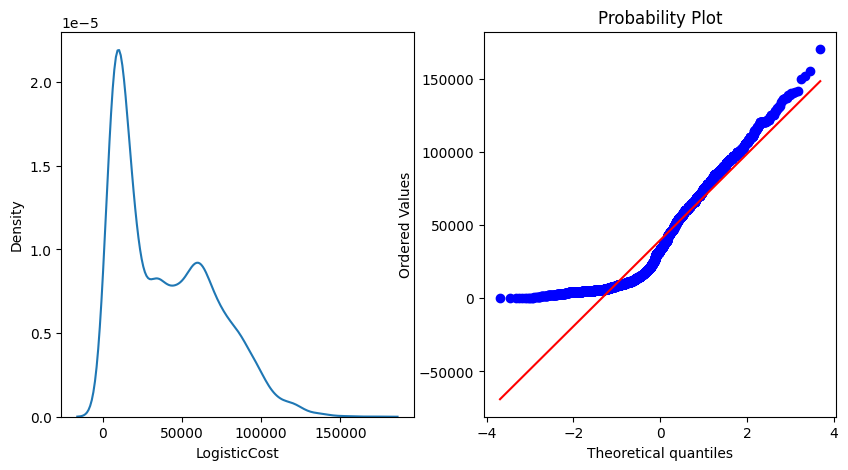

In [44]:
normality(target_var_original,'LogisticCost')

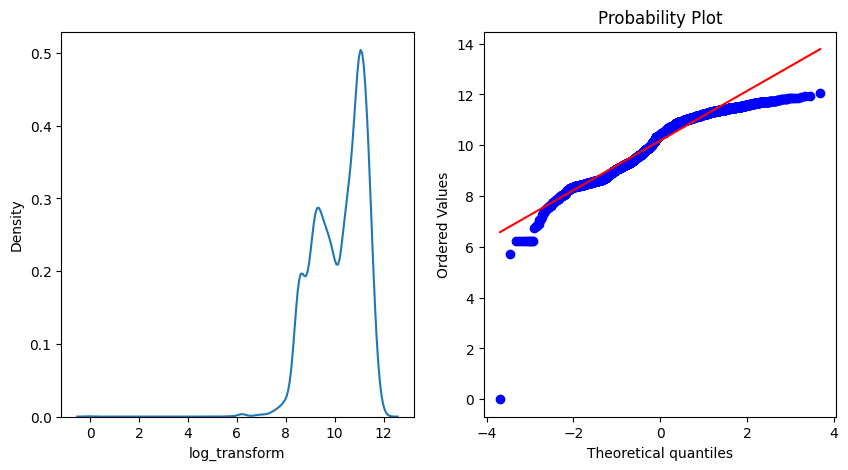

In [45]:
#Applying log transformation
target_var_original['log_transform']=np.log(target_var_original['LogisticCost'])
normality(target_var_original,'log_transform')

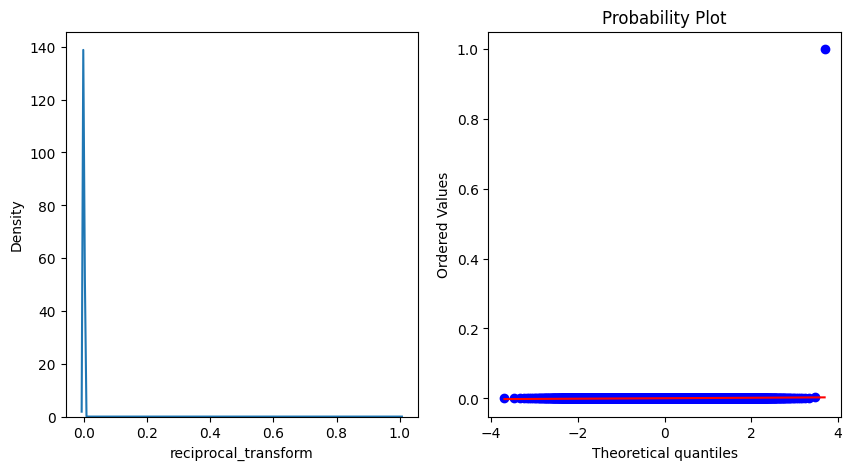

In [46]:
#applying reciprocal transformation
target_var_original['reciprocal_transform']=1/target_var_original.LogisticCost
normality(target_var_original,'reciprocal_transform')

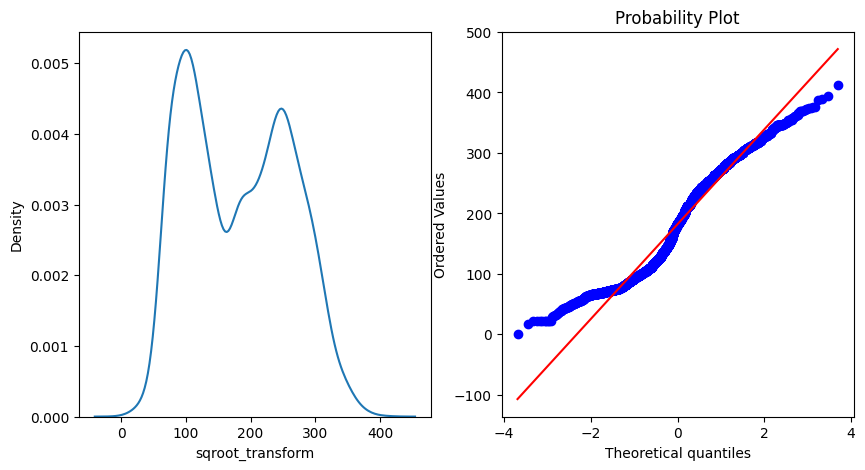

In [47]:
#applying sqroot transformation
target_var_original['sqroot_transform']= np.sqrt(target_var_original.LogisticCost)
normality(target_var_original,'sqroot_transform')
     

In [48]:

df_1['LogisticCost'] = np.log(df_1['LogisticCost'])


In [49]:
#Checking distribution of Picked Quantity
picked_quantity = df_1[['PickedQuantity']].copy()

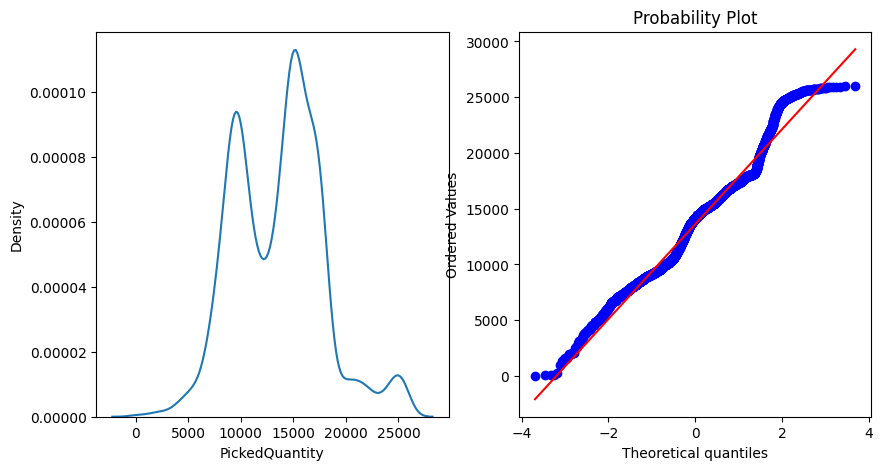

In [50]:
normality(picked_quantity,'PickedQuantity')

In [51]:
#Data agumentation using SDV library 
#from sdv.tabular import CTGAN
#gan_model = CTGAN(epochs = 150)

In [52]:
#gan_model.fit(df_1)

In [53]:
#Synthesised 1k samples
#sampled_data  = gan_model.sample(1000)

In [54]:
df_1.describe()

,CategoryName,PickedQuantity,LogisticCost,SellerPickupCity,SellerPickupState,RecyclerShippingCity,RecyclerShippingState,PickZipcode,DropZip,route,distance
count,6217.000000,6217.000000,6217.000000,6217.000000,6217.000000,6217.000000,6217.000000,6217.000000,6217.000000,6217.000000,6217.000000
mean,7.437510,13608.727200,10.182141,131.178221,14.925848,59.339392,11.333923,460926.130770,363116.580505,681.965739,820.425244
std,1.674049,4301.317987,1.007949,56.995169,6.909192,27.229853,5.501825,187111.966354,150614.819288,425.630033,609.176990
min,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,110018.000000,121004.000000,0.000000,4.742300
25%,8.000000,10000.000000,9.350102,80.000000,9.000000,41.000000,7.000000,400067.000000,244923.000000,305.000000,276.960000
50%,8.000000,14170.000000,10.404263,136.000000,16.000000,67.000000,11.000000,501218.000000,332404.000000,647.000000,813.805000
75%,8.000000,16360.000000,11.039813,166.000000,20.000000,80.000000,16.000000,560068.000000,462046.000000,1044.000000,1342.349100
max,8.000000,25995.000000,12.043554,244.000000,24.000000,92.000000,17.000000,854326.000000,815301.000000,1541.000000,2481.477800


In [55]:
#sampled_data.describe()

In [56]:
#checking shape of the data sample
#sampled_data.shape

In [57]:
#Dropping Duplicates
#sampled_data.drop_duplicates()

In [58]:
#checking shape after dropping duplicates
#sampled_data.shape

In [59]:
#Final dataframe is created by concatinating original and sampled data
#final_df = pd.concat([df_1, sampled_data])
final_df = df_1

In [60]:
final_df.shape

(6217, 11)

In [61]:
final_df = final_df.drop_duplicates()

In [62]:
final_df.shape

(5610, 11)

# Exploratory Data Analysis - part 2

In [63]:
#Numerical Features
num_fea_1 = final_df[['LogisticCost','PickedQuantity']]

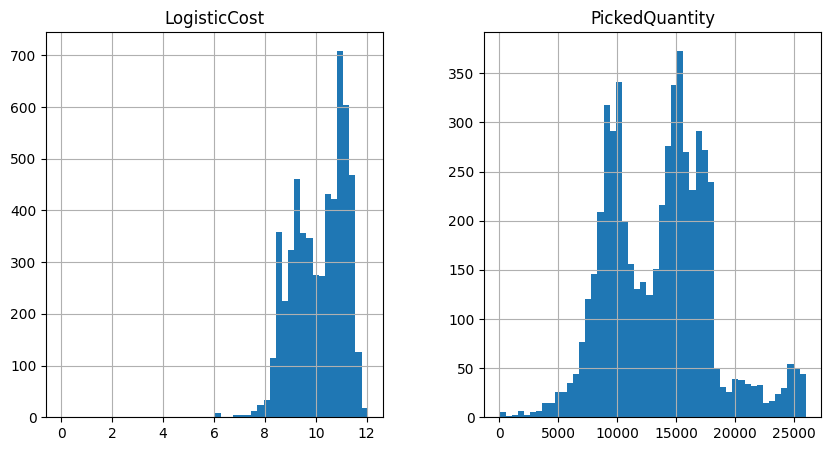

In [64]:
num_fea_1.hist(bins=50, figsize=(10,5));

In [65]:
#Removing data points which as zero values
final_df = final_df[final_df['PickedQuantity'] != 0 ]
final_df = final_df[final_df['LogisticCost'] > 0 ]


In [66]:
final_df.head(100)

,CategoryName,PickedQuantity,LogisticCost,SellerPickupCity,SellerPickupState,RecyclerShippingCity,RecyclerShippingState,PickZipcode,DropZip,route,distance
0,8,17260,11.156251,138,16,89,16,560083,311001,1158,1660.3600
1,8,17060,11.156251,136,16,89,16,560068,311001,1308,1666.1665
2,8,9520,9.566615,91,9,67,11,401208,394125,395,270.0400
4,8,24860,11.567934,210,22,89,16,600075,311024,1483,2027.2300
5,8,17940,11.350407,224,23,88,17,533435,209304,1325,1460.9481
6,8,17990,11.350407,224,23,88,17,533435,209304,1325,1460.9481
7,8,16345,10.849337,166,20,89,16,501512,311024,989,1385.7364
9,8,9760,9.591513,80,9,67,11,400010,394125,398,334.7969
10,8,9890,9.604745,90,9,67,11,400612,394110,380,292.7707
11,8,8660,9.011157,38,8,41,17,226020,250205,193,483.2200


In [67]:
final_df = final_df.drop(['PickZipcode','DropZip','route'],axis = 1)

<AxesSubplot: >

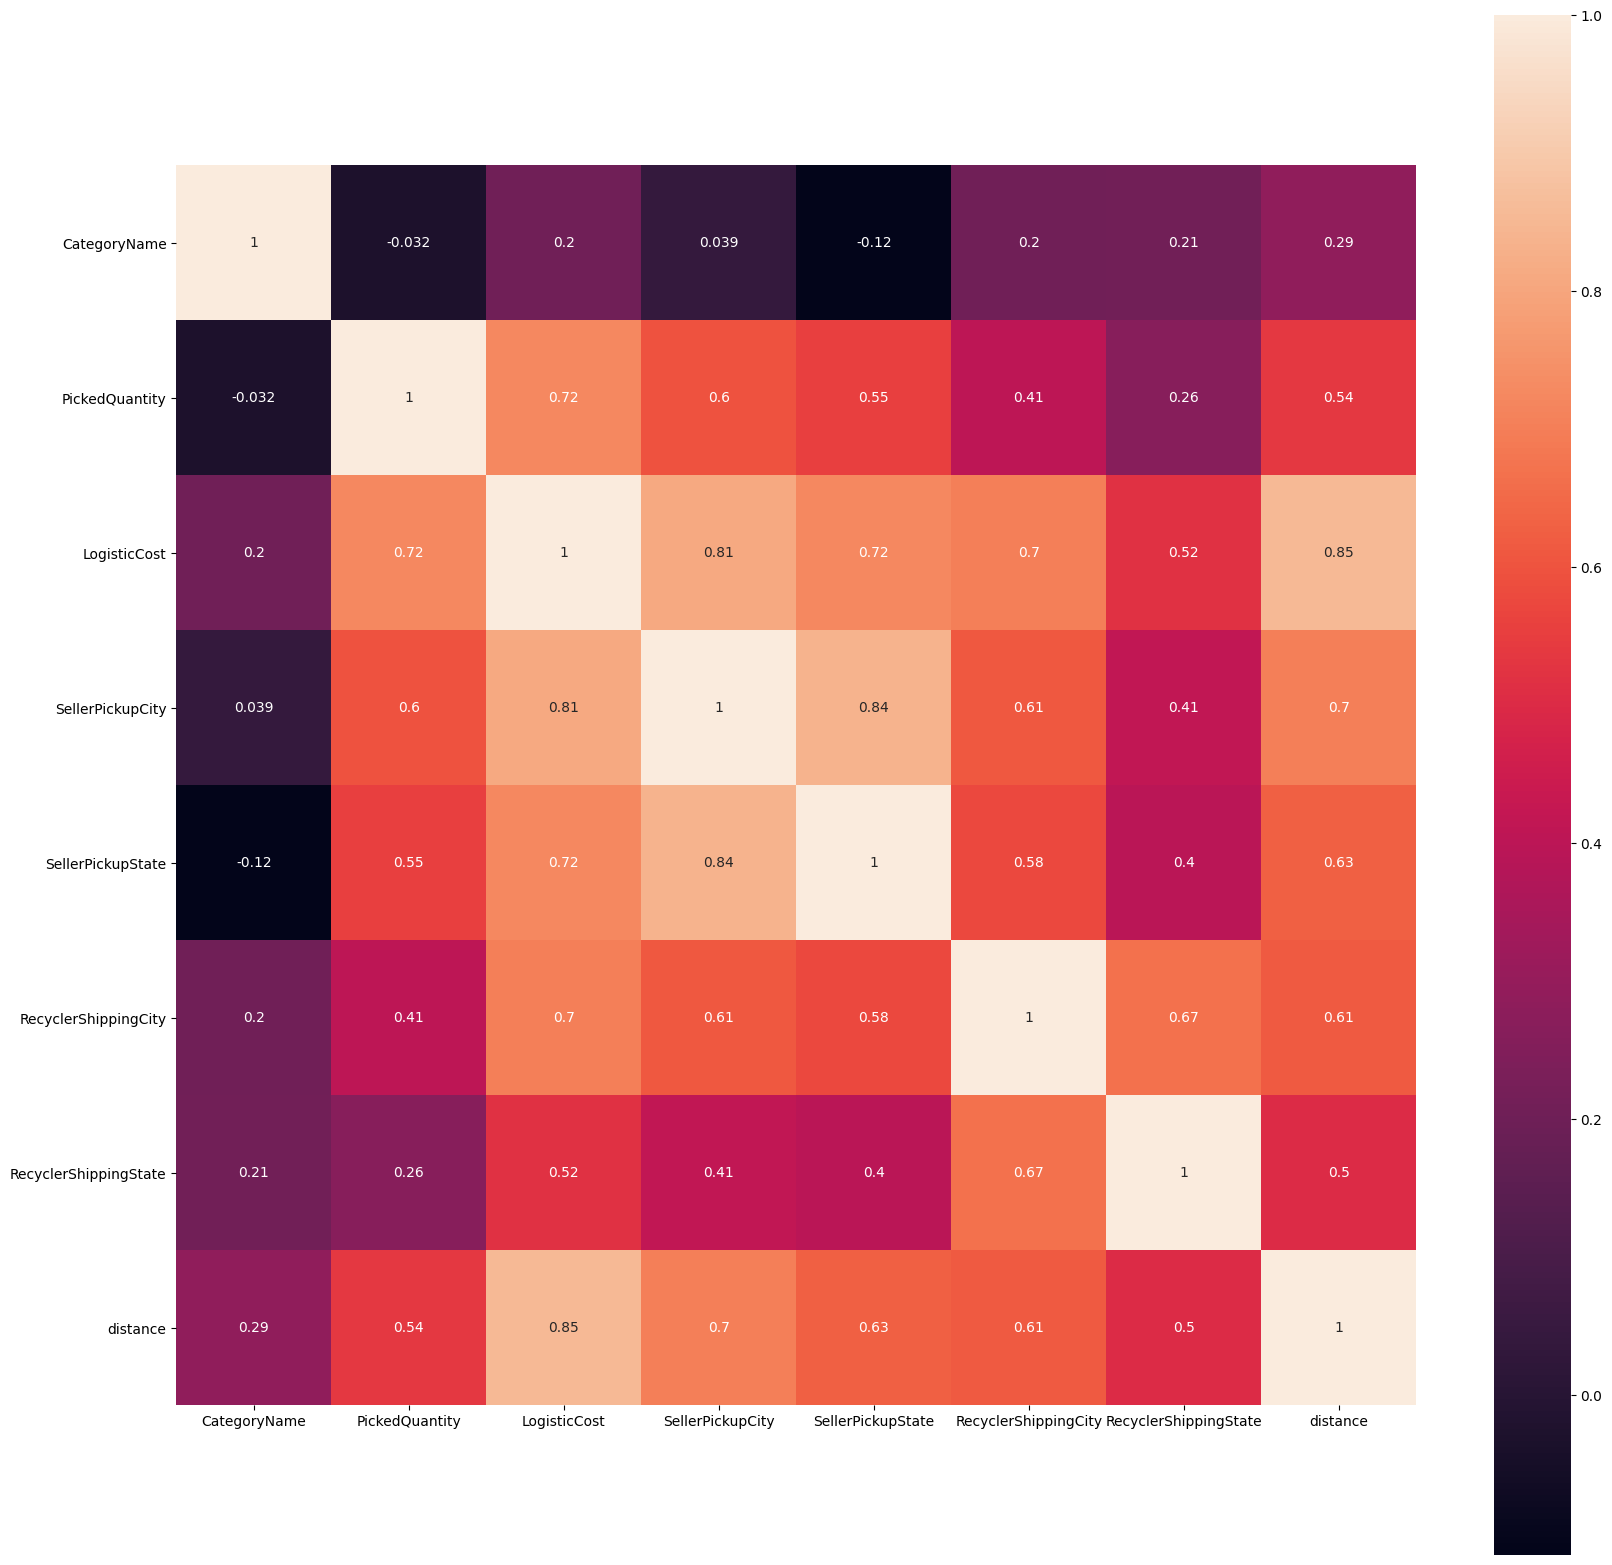

In [68]:
#checking correlation between the variables
corr_plot = final_df.corr()
fig = plt.figure(figsize=(20,20))
sns.heatmap(corr_plot, annot=True, square=True)

In [69]:
final_df.shape

(5609, 8)

# Data Pre-Processing

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor
import xgboost as xgb
from catboost import CatBoostRegressor
from sklearn import neighbors
from sklearn.svm import SVR
import time
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error


In [71]:
#preprocessing data
X_data = final_df.drop(columns=['LogisticCost']).copy()
y_data = final_df[['LogisticCost']].copy()

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.2, random_state = 0)

# Training Model

In [73]:
models = [
           ['LinearRegression',LinearRegression()],
           ['Lasso: ', Lasso()],
           ['Ridge: ', Ridge()],
           ['ElasticNet: ', ElasticNet(random_state=0)],
           ['DecisionTreeRegresson: ', DecisionTreeRegressor()],
           ['KNeighborsRegressor: ',  neighbors.KNeighborsRegressor()],
           ['SVR:' , SVR(kernel='rbf')],
           ['RandomForest ',RandomForestRegressor()],
           ['ExtraTreeRegressor :',ExtraTreesRegressor()],
           ['GradientBoostingClassifier: ', GradientBoostingRegressor()] ,
           ['XGBRegressor: ', xgb.XGBRegressor()],
           ['catBoostRegressor:',CatBoostRegressor()],
           ['AdaBoostRegressor: ',AdaBoostRegressor()]
         ]

In [74]:
model_data = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 78
    curr_model_data["Name"] = name
    start = time.time()
    curr_model.fit(X_train,y_train)
    end = time.time()
    curr_model_data["Train_Time"] = end - start
    curr_model_data["Train_R2_Score"] = metrics.r2_score(y_train,curr_model.predict(X_train))
    curr_model_data["Test_R2_Score"] = metrics.r2_score(y_test,curr_model.predict(X_test))
    curr_model_data["Test_RMSE_Score"] = sqrt(mean_squared_error(y_test,curr_model.predict(X_test)))
    curr_model_data["Test_MAE_Score"] = mean_absolute_error(y_test,curr_model.predict(X_test))
    
    model_data.append(curr_model_data)

Learning rate set to 0.051903
0:	learn: 0.9667712	total: 150ms	remaining: 2m 29s
1:	learn: 0.9259890	total: 152ms	remaining: 1m 16s
2:	learn: 0.8870848	total: 155ms	remaining: 51.4s
3:	learn: 0.8495399	total: 157ms	remaining: 39s
4:	learn: 0.8151574	total: 159ms	remaining: 31.5s
5:	learn: 0.7829664	total: 160ms	remaining: 26.5s
6:	learn: 0.7519679	total: 162ms	remaining: 23s
7:	learn: 0.7224152	total: 164ms	remaining: 20.3s
8:	learn: 0.6957785	total: 165ms	remaining: 18.2s
9:	learn: 0.6699017	total: 167ms	remaining: 16.5s
10:	learn: 0.6452386	total: 169ms	remaining: 15.2s
11:	learn: 0.6212281	total: 170ms	remaining: 14s
12:	learn: 0.5983393	total: 172ms	remaining: 13.1s
13:	learn: 0.5771167	total: 173ms	remaining: 12.2s
14:	learn: 0.5570342	total: 175ms	remaining: 11.5s
15:	learn: 0.5386691	total: 176ms	remaining: 10.8s
16:	learn: 0.5217736	total: 178ms	remaining: 10.3s
17:	learn: 0.5052083	total: 179ms	remaining: 9.78s
18:	learn: 0.4893876	total: 181ms	remaining: 9.34s
19:	learn: 0.47

In [75]:
model_data

[{'Name': 'LinearRegression',
  'Train_Time': 0.010684967041015625,
  'Train_R2_Score': 0.8913386406356669,
  'Test_R2_Score': 0.8774505904672085,
  'Test_RMSE_Score': 0.353464215225601,
  'Test_MAE_Score': 0.24294943950230913},
 {'Name': 'Lasso: ',
  'Train_Time': 0.0,
  'Train_R2_Score': 0.8865824580097801,
  'Test_R2_Score': 0.8722955954785487,
  'Test_RMSE_Score': 0.36082180850048073,
  'Test_MAE_Score': 0.2537389890520688},
 {'Name': 'Ridge: ',
  'Train_Time': 0.0,
  'Train_R2_Score': 0.8913386406113858,
  'Test_R2_Score': 0.8774505031770861,
  'Test_RMSE_Score': 0.3534643411092315,
  'Test_MAE_Score': 0.2429498834297782},
 {'Name': 'ElasticNet: ',
  'Train_Time': 0.008069276809692383,
  'Train_R2_Score': 0.8882077596834558,
  'Test_R2_Score': 0.8737802072005687,
  'Test_RMSE_Score': 0.35871833260408503,
  'Test_MAE_Score': 0.2511389415796283},
 {'Name': 'DecisionTreeRegresson: ',
  'Train_Time': 0.015998125076293945,
  'Train_R2_Score': 0.999885808414562,
  'Test_R2_Score': 0.889

In [76]:
result_df = pd.DataFrame(model_data)
print(result_df)

                            Name  Train_Time  Train_R2_Score  Test_R2_Score  \
0               LinearRegression    0.010685        0.891339       0.877451   
1                        Lasso:     0.000000        0.886582       0.872296   
2                        Ridge:     0.000000        0.891339       0.877451   
3                   ElasticNet:     0.008069        0.888208       0.873780   
4        DecisionTreeRegresson:     0.015998        0.999886       0.889096   
5          KNeighborsRegressor:     0.007926        0.920275       0.871485   
6                           SVR:    0.491860        0.860078       0.851331   
7                  RandomForest     0.832493        0.991450       0.934464   
8           ExtraTreeRegressor :    0.609046        0.999886       0.925951   
9   GradientBoostingClassifier:     0.263900        0.945578       0.919509   
10                XGBRegressor:     0.172929        0.989773       0.932765   
11            catBoostRegressor:    1.640788        

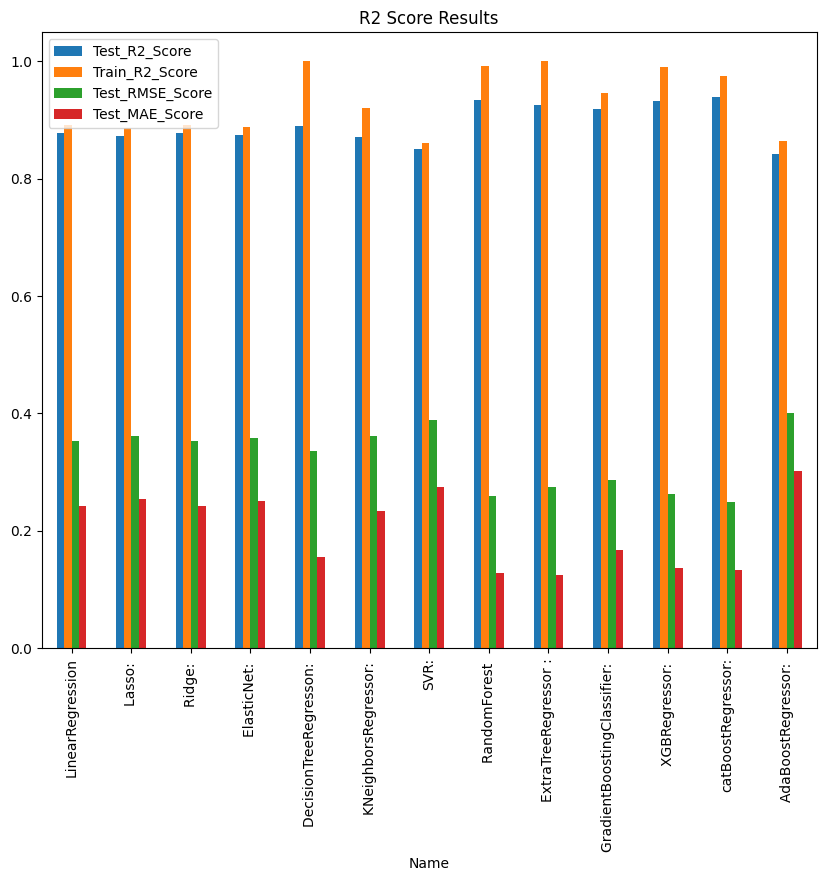

In [77]:
#visualizing result
result_df.plot(x="Name", y=['Test_R2_Score' , 'Train_R2_Score','Test_RMSE_Score','Test_MAE_Score' ], 
               kind="bar" , 
               title = 'R2 Score Results' , 
               figsize= (10,8)) ;

# Model Selection

In [79]:
from catboost import CatBoostRegressor
catboost_noSyn_data = CatBoostRegressor() 
catboost_noSyn_data.fit(X_train, y_train)

Learning rate set to 0.051903
0:	learn: 0.9667712	total: 1.62ms	remaining: 1.62s
1:	learn: 0.9259890	total: 3.24ms	remaining: 1.61s
2:	learn: 0.8870848	total: 4.9ms	remaining: 1.63s
3:	learn: 0.8495399	total: 6.82ms	remaining: 1.7s
4:	learn: 0.8151574	total: 8.4ms	remaining: 1.67s
5:	learn: 0.7829664	total: 9.68ms	remaining: 1.6s
6:	learn: 0.7519679	total: 10.9ms	remaining: 1.55s
7:	learn: 0.7224152	total: 12.2ms	remaining: 1.51s
8:	learn: 0.6957785	total: 13.4ms	remaining: 1.48s
9:	learn: 0.6699017	total: 14.7ms	remaining: 1.45s
10:	learn: 0.6452386	total: 16ms	remaining: 1.44s
11:	learn: 0.6212281	total: 17.4ms	remaining: 1.43s
12:	learn: 0.5983393	total: 18.6ms	remaining: 1.41s
13:	learn: 0.5771167	total: 19.9ms	remaining: 1.4s
14:	learn: 0.5570342	total: 21.1ms	remaining: 1.39s
15:	learn: 0.5386691	total: 22.4ms	remaining: 1.37s
16:	learn: 0.5217736	total: 23.7ms	remaining: 1.37s
17:	learn: 0.5052083	total: 24.9ms	remaining: 1.36s
18:	learn: 0.4893876	total: 26.1ms	remaining: 1.35s

In [80]:
print(sqrt(mean_squared_error(y_test,catboost_noSyn_data.predict(X_test))))

0.24980736851240976


# Hyper Parameter Tuning

In [1]:
import optuna

C:\Users\yokeshkumar\anaconda3\envs\recykal\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [78]:
def objective(trial):
    # hyperparameters
    max_depth = trial.suggest_int("max_depth", 2, 10)
    n_estimators = trial.suggest_int("n_estimators", 50, 500)
    learning_rate = trial.suggest_float("learning_rate", 0.01,0.3)
    subsample = trial.suggest_float("subsample", 0.5, 1.0)
    colsample_bytree = trial.suggest_float("colsample_bytree", 0.5, 1.0)
    min_child_weight = trial.suggest_int("min_child_weight", 1, 10)

    # model training
    model = xgb.XGBRegressor(
        max_depth=max_depth,
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        min_child_weight=min_child_weight
    )
    model.fit(X_train, y_train)

    # prediction and evaluation
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    
    return mse

# optuna optimization
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=100)

# best hyperparameters
best_params = study.best_params
print("Best hyperparameters: ", best_params)

[I 2023-02-07 11:39:13,350] A new study created in memory with name: no-name-bedeb0e5-4f4b-424c-bb4a-101ed314c8b4
[I 2023-02-07 11:39:14,046] Trial 0 finished with value: 0.06292877819363185 and parameters: {'max_depth': 7, 'n_estimators': 463, 'learning_rate': 0.06904694162048922, 'subsample': 0.6304068126763743, 'colsample_bytree': 0.5663804845825064, 'min_child_weight': 3}. Best is trial 0 with value: 0.06292877819363185.
[I 2023-02-07 11:39:14,182] Trial 1 finished with value: 0.06190602302974784 and parameters: {'max_depth': 4, 'n_estimators': 110, 'learning_rate': 0.19461545893155144, 'subsample': 0.9719917930277733, 'colsample_bytree': 0.9968982985415782, 'min_child_weight': 1}. Best is trial 1 with value: 0.06190602302974784.
[I 2023-02-07 11:39:14,433] Trial 2 finished with value: 0.07950356420863533 and parameters: {'max_depth': 3, 'n_estimators': 254, 'learning_rate': 0.09818819970203543, 'subsample': 0.5415666960946335, 'colsample_bytree': 0.951125514197897, 'min_child_weig

Best hyperparameters:  {'max_depth': 6, 'n_estimators': 260, 'learning_rate': 0.06949346864973531, 'subsample': 0.927813551432424, 'colsample_bytree': 0.583658203221659, 'min_child_weight': 1}


In [81]:
# model training
Xgb_Log_model = xgb.XGBRegressor(
        max_depth=6,
        n_estimators=260,
        learning_rate=0.06,
        subsample=0.9,
        colsample_bytree=0.58,
        min_child_weight= 1
    )

In [82]:
Xgb_Log_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.58,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.06, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=260, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [83]:
print('Test RMSE Score:',sqrt(mean_squared_error(y_test,Xgb_Log_model.predict(X_test))))

Test RMSE Score: 0.2450281384067799


# Model Explainability

!pip install shap 

In [84]:
import shap

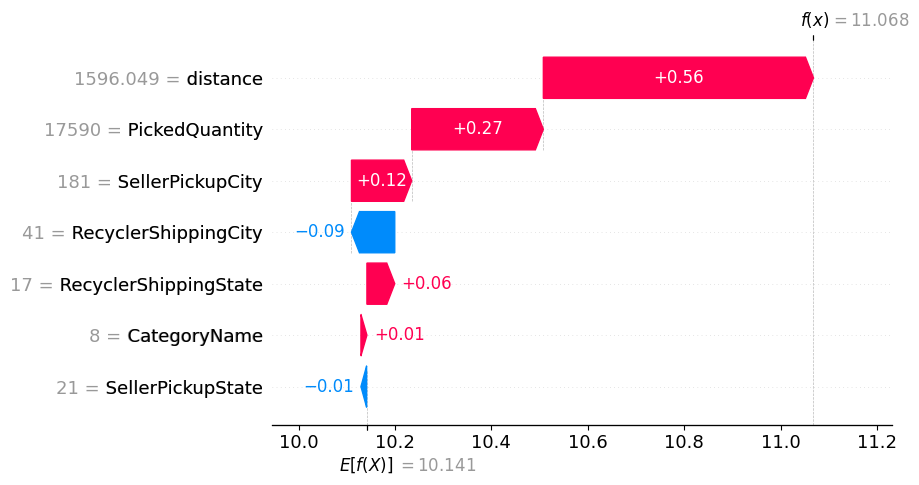

In [86]:
# get shap values
explainer = shap.Explainer(Xgb_Log_model)
shap_values = explainer(X_train)

# waterfall plot for first observation
shap.plots.waterfall(shap_values[0])

# Saving Model

In [87]:
import pickle

In [88]:
pickle.dump(Xgb_Log_model, open('Xgb_logistic_cost_noDataSyn_0.24_New.pkl', 'wb'))

In [89]:
pickled_model = pickle.load(open('Xgb_logistic_cost_noDataSyn_0.24_New.pkl', 'rb'))
logistic_cost = pickled_model.predict(X_test)

In [95]:
Xgb_prediction_noDataSyn = np.expm1(logistic_cost)

In [96]:
y_gt_test = np.expm1(y_test)

In [97]:
y_test_df = pd.DataFrame(y_gt_test).reset_index(drop=True)

In [98]:
y_test_df

,LogisticCost
0,59999.0
1,72999.0
2,6669.0
3,84999.0
4,35699.0
...,...
1117,14714.0
1118,78999.0
1119,39999.0
1120,83999.0


In [99]:
prediction = pd.DataFrame(cat_prediction_noDataSyn)

In [100]:
prediction.columns = ['Xgb_prediction_noDataSyn']

In [101]:
prediction

,Xgb_prediction_noDataSyn
0,67223.898438
1,74473.789062
2,7621.189453
3,71927.156250
4,35441.941406
...,...
1117,14807.276367
1118,77224.804688
1119,46942.566406
1120,69387.617188


In [102]:
pd.concat([y_test_df,prediction],ignore_index=True)

,LogisticCost,Xgb_prediction_noDataSyn
0,59999.0,NaN
1,72999.0,NaN
2,6669.0,NaN
3,84999.0,NaN
4,35699.0,NaN
...,...,...
2239,NaN,14807.276367
2240,NaN,77224.804688
2241,NaN,46942.566406
2242,NaN,69387.617188


In [103]:
data  = list(zip(y_test_df['LogisticCost'],prediction['Xgb_prediction_noDataSyn']))

In [104]:
result_df = pd.DataFrame(data, columns =['LogisticCost', 'Xgb_prediction_noDataSyn'])

In [105]:
result_df.head(50)

,LogisticCost,Xgb_prediction_noDataSyn
0,59999.0,67223.898438
1,72999.0,74473.789062
2,6669.0,7621.189453
3,84999.0,71927.156250
4,35699.0,35441.941406
5,6363.0,6424.208496
6,96999.0,83459.960938
7,22759.0,22354.416016
8,499.0,3050.387451
9,5116.0,5865.107910


In [106]:
result_df['diff'] = abs(result_df['LogisticCost']-result_df['Xgb_prediction_noDataSyn'])

In [107]:
result_df['Percentage_Error'] = ((result_df['diff'] / result_df['LogisticCost']) * 100)

In [108]:
result_df.to_csv('Xgb_LogisticCost_Prediction_noMildSteel_noDataSyn_24')

# ExtraTree Model Test

In [108]:
ExtraTreeRegressor = ExtraTreesRegressor()

In [109]:
ExtraTreeRegressor.fit(X_train, y_train)

ExtraTreesRegressor()

In [110]:
# get shap values
#explainer = shap.Explainer(ExtraTreeRegressor)
#shap_values = explainer(X_train)

# waterfall plot for first observation
#shap.plots.waterfall(shap_values[0])

In [111]:
pickle.dump(ExtraTreeRegressor, open('ExTreeLogistic_noDataSyn.pkl', 'wb'))

In [112]:
pickled_model = pickle.load(open('ExTreeLogistic_noDataSyn.pkl', 'rb'))
Et_logistic_cost_noDatasyn = pickled_model.predict(X_test)

In [113]:
Et_prediction_noDataSyn = np.expm1(Et_logistic_cost_noDatasyn)

In [114]:
Et_prediction_noDataSyn = pd.DataFrame(Et_prediction_noDataSyn)

In [115]:
Et_prediction_noDataSyn.columns = ['Et_PredictedCost_noDataSyn']

In [116]:
# pd.concat([y_test_df,Et_prediction],ignore_index=True)

In [117]:
Ex_data  = list(zip(y_test_df['LogisticCost'],Et_prediction_noDataSyn['Et_PredictedCost_noDataSyn'],result_df['cat_prediction_noDataSyn']))

In [118]:
Ex_result_df = pd.DataFrame(Ex_data, columns =['LogisticCost', 'Et_PredictedCost_noDataSyn','cat_prediction_noDataSyn'])

In [119]:
Ex_result_df

,LogisticCost,Et_PredictedCost_noDataSyn,cat_prediction_noDataSyn
0,59999.0,61517.593634,68094.265270
1,72999.0,80916.097473,74287.460483
2,6669.0,6982.977629,7385.786781
3,84999.0,81553.104189,71391.819626
4,35699.0,34999.000000,35690.826384
...,...,...,...
1117,14714.0,16034.790674,15001.663045
1118,78999.0,76609.626225,78035.175481
1119,39999.0,45107.046598,46037.607825
1120,83999.0,80077.339391,74426.564637


In [120]:
Ex_result_df['avg'] = ((Ex_result_df['Et_PredictedCost_noDataSyn'] +Ex_result_df['cat_prediction_noDataSyn'])/2)

In [121]:
Ex_result_df

,LogisticCost,Et_PredictedCost_noDataSyn,cat_prediction_noDataSyn,avg
0,59999.0,61517.593634,68094.265270,64805.929452
1,72999.0,80916.097473,74287.460483,77601.778978
2,6669.0,6982.977629,7385.786781,7184.382205
3,84999.0,81553.104189,71391.819626,76472.461907
4,35699.0,34999.000000,35690.826384,35344.913192
...,...,...,...,...
1117,14714.0,16034.790674,15001.663045,15518.226859
1118,78999.0,76609.626225,78035.175481,77322.400853
1119,39999.0,45107.046598,46037.607825,45572.327212
1120,83999.0,80077.339391,74426.564637,77251.952014


In [122]:
Ex_result_df['diff'] = abs(Ex_result_df['LogisticCost']-Ex_result_df['avg'])

In [123]:
Ex_result_df['Percentage_Error'] = ((Ex_result_df['diff'] / Ex_result_df['LogisticCost']) * 100)

In [124]:
Ex_result_df.to_csv('Cat_Et_Combined_Model_Pre_noDataSyn')

In [125]:
Ex_result_df["Cat_Error%"] = 100* abs(Ex_result_df["LogisticCost"]-Ex_result_df['cat_prediction_noDataSyn'])/Ex_result_df['LogisticCost']

In [126]:
np.sum(Ex_result_df['Percentage_Error']-Ex_result_df['Cat_Error%'])

-747.3647427881369

# predicting training data using catboost

In [127]:
pickled_model_1 = pickle.load(open('Cat_logistic_cost_noDataSyn_0.24.pkl', 'rb'))
logistic_cost_train = pickled_model_1.predict(X_train)

In [128]:
cat_prediction = np.expm1(logistic_cost_train)

In [129]:
cat_train_prediction = pd.DataFrame(cat_prediction)

In [130]:
cat_train_prediction.columns = ['Cat_train_PredictedCost_noDataSyn']

In [131]:
y_gt_train = np.expm1(y_train)

In [132]:
y_train_df = pd.DataFrame(y_gt_train).reset_index(drop=True)

In [133]:
train_data  = list(zip(y_train_df['LogisticCost'],cat_train_prediction['Cat_train_PredictedCost_noDataSyn']))

In [134]:
train_result_df = pd.DataFrame(train_data, columns =['LogisticCost', 'Cat_train_PredictedCost_noDataSyn'])

In [135]:
train_result_df

,LogisticCost,Cat_train_PredictedCost_noDataSyn
0,62399.0,63905.629096
1,5574.0,5763.546316
2,60279.0,69406.913995
3,60349.0,49761.016631
4,12999.0,15852.840929
...,...,...
4482,68999.0,72179.192419
4483,9804.0,10637.560490
4484,17444.0,17490.229524
4485,14799.0,12518.924420


In [136]:
train_result_df['diff'] = abs(train_result_df['LogisticCost']-train_result_df['Cat_train_PredictedCost_noDataSyn'])

In [137]:
train_result_df['Percentage_Error'] = ((train_result_df['diff'] / train_result_df['LogisticCost']) * 100)

In [138]:
train_result_df.to_csv('Cat_Traindata_Pre_noDataSyn')

# low performance model

In [139]:
adaboost = AdaBoostRegressor()
adaboost.fit(X_train,y_train)

AdaBoostRegressor()

In [140]:
pickle.dump(adaboost, open('ada_logistic_cost_noMildSteelnoDataSyn_.pkl', 'wb'))

In [142]:
pickled_model = pickle.load(open('ada_logistic_cost_noMildSteelnoDataSyn_.pkl', 'rb'))
logistic_cost = pickled_model.predict(X_test)

In [143]:
ada_prediction_noDataSyn = np.expm1(logistic_cost)

In [144]:
y_gt_test = np.expm1(y_test)

In [145]:
y_test_df = pd.DataFrame(y_gt_test).reset_index(drop=True)

In [146]:
prediction = pd.DataFrame(ada_prediction_noDataSyn)

In [147]:
prediction.columns = ['ada_prediction_noDataSyn']

In [148]:
pd.concat([y_test_df,prediction],ignore_index=True)

,LogisticCost,ada_prediction_noDataSyn
0,59999.0,NaN
1,72999.0,NaN
2,6669.0,NaN
3,84999.0,NaN
4,35699.0,NaN
...,...,...
2239,NaN,9535.754857
2240,NaN,60091.216997
2241,NaN,48514.774659
2242,NaN,62664.649929


In [149]:
data  = list(zip(y_test_df['LogisticCost'],prediction['ada_prediction_noDataSyn']))

In [150]:
ada_result_df = pd.DataFrame(data, columns =['LogisticCost', 'ada_prediction_noDataSyn'])

In [152]:
ada_result_df['diff'] = abs(ada_result_df['LogisticCost']-ada_result_df['ada_prediction_noDataSyn'])

In [153]:
ada_result_df['Percentage_Error'] = ((ada_result_df['diff'] / ada_result_df['LogisticCost']) * 100)

In [154]:
ada_result_df.to_csv('Ada_LogisticCost_Prediction_noMildSteel_noDataSyn')

# Combined Model(Randomforest,ExtraTreeRegessor,GB,XGB,CatBoost)

In [156]:
randomforest = RandomForestRegressor()
randomforest.fit(X_train,y_train)
pickle.dump(randomforest, open('ran_logistic_cost_noMildSteelnoDataSyn.pkl', 'wb'))
pickled_model = pickle.load(open('ran_logistic_cost_noMildSteelnoDataSyn.pkl', 'rb'))
logistic_cost = pickled_model.predict(X_test)
ran_prediction_noDataSyn = np.expm1(logistic_cost)
prediction = pd.DataFrame(ran_prediction_noDataSyn)
prediction.columns = ['ran_prediction_noDataSyn']
pd.concat([y_test_df,prediction],ignore_index=True)
data  = list(zip(y_test_df['LogisticCost'],prediction['ran_prediction_noDataSyn']))
ran_result_df = pd.DataFrame(data, columns =['LogisticCost', 'ran_prediction_noDataSyn'])
ran_result_df['diff'] = abs(ran_result_df['LogisticCost']-ran_result_df['ran_prediction_noDataSyn'])
ran_result_df['Percentage_Error'] = ((ran_result_df['diff'] / ran_result_df['LogisticCost']) * 100)
ran_result_df.to_csv('ran_LogisticCost_Prediction_noMildSteel_noDataSyn')



In [158]:
GB = GradientBoostingRegressor()
GB.fit(X_train,y_train)
pickle.dump(GB, open('GB_logistic_cost_noMildSteelnoDataSyn.pkl', 'wb'))
pickled_model = pickle.load(open('GB_logistic_cost_noMildSteelnoDataSyn.pkl', 'rb'))
logistic_cost = pickled_model.predict(X_test)
GB_prediction_noDataSyn = np.expm1(logistic_cost)
prediction = pd.DataFrame(GB_prediction_noDataSyn)
prediction.columns = ['GB_prediction_noDataSyn']
pd.concat([y_test_df,prediction],ignore_index=True)
data  = list(zip(y_test_df['LogisticCost'],prediction['GB_prediction_noDataSyn']))
GB_result_df = pd.DataFrame(data, columns =['LogisticCost', 'GB_prediction_noDataSyn'])
GB_result_df['diff'] = abs(GB_result_df['LogisticCost']-GB_result_df['GB_prediction_noDataSyn'])
GB_result_df['Percentage_Error'] = ((GB_result_df['diff'] / GB_result_df['LogisticCost']) * 100)
GB_result_df.to_csv('GB_LogisticCost_Prediction_noMildSteel_noDataSyn')


In [159]:
xgb = xgb.XGBRegressor()
xgb.fit(X_train,y_train)
pickle.dump(xgb, open('xgb_logistic_cost_noMildSteelnoDataSyn.pkl', 'wb'))
pickled_model = pickle.load(open('xgb_logistic_cost_noMildSteelnoDataSyn.pkl', 'rb'))
logistic_cost = pickled_model.predict(X_test)
xgb_prediction_noDataSyn = np.expm1(logistic_cost)
prediction = pd.DataFrame(xgb_prediction_noDataSyn)
prediction.columns = ['xgb_prediction_noDataSyn']
pd.concat([y_test_df,prediction],ignore_index=True)
data  = list(zip(y_test_df['LogisticCost'],prediction['xgb_prediction_noDataSyn']))
xgb_result_df = pd.DataFrame(data, columns =['LogisticCost', 'xgb_prediction_noDataSyn'])
xgb_result_df['diff'] = abs(xgb_result_df['LogisticCost']-xgb_result_df['xgb_prediction_noDataSyn'])
xgb_result_df['Percentage_Error'] = ((xgb_result_df['diff'] / xgb_result_df['LogisticCost']) * 100)
xgb_result_df.to_csv('xgb_LogisticCost_Prediction_noMildSteel_noDataSyn')

In [160]:
Combined_data  = list(zip(y_test_df['LogisticCost'],Et_prediction_noDataSyn['Et_PredictedCost_noDataSyn'],result_df['cat_prediction_noDataSyn'],
                         ran_result_df['ran_prediction_noDataSyn'],GB_result_df['GB_prediction_noDataSyn'],xgb_result_df['xgb_prediction_noDataSyn']))

In [162]:
Combined_result_df = pd.DataFrame(Combined_data, columns =['LogisticCost', 'Et_PredictedCost_noDataSyn','cat_prediction_noDataSyn',
                                                    'ran_prediction_noDataSyn','GB_prediction_noDataSyn','xgb_prediction_noDataSyn'])

In [163]:
Combined_result_df['avg'] = ((Combined_result_df['Et_PredictedCost_noDataSyn'] +Combined_result_df['cat_prediction_noDataSyn'] +
                             Combined_result_df['ran_prediction_noDataSyn']+Combined_result_df['GB_prediction_noDataSyn']+
                             Combined_result_df['xgb_prediction_noDataSyn'])/5)

In [164]:
Combined_result_df['diff'] = abs(Combined_result_df['LogisticCost']-Combined_result_df['avg'])

In [165]:
Combined_result_df['Percentage_Error'] = ((Combined_result_df['diff'] / Combined_result_df['LogisticCost']) * 100)

In [166]:
Combined_result_df.to_csv('5_Combined_Model_Pre_noDataSyn')

# Weighted Average

In [174]:
Ex_result_df['Weighted_Avg'] = (Ex_result_df['cat_prediction_noDataSyn'] * 0.8) + (Ex_result_df['Et_PredictedCost_noDataSyn']*0.2)

In [175]:
Ex_result_df['Weighted_diff'] = abs(Ex_result_df['LogisticCost']-Ex_result_df['Weighted_Avg'])

In [176]:
Ex_result_df['Weighted_Percentage_Error'] = ((Ex_result_df['Weighted_diff'] / Ex_result_df['LogisticCost']) * 100)

In [177]:
Ex_result_df.to_csv('CombinedModel_Weighted_error')